# Lab1
* **Name**: Utkarsh Prakash
* **Roll Number**: 180030042 <br />

## Experiment 1

**Title**: Demonstrate the working of different models of neurons by implementing NAND gate, NOR gate and XOR gate.

**Objective**: To observe and understand the working of McCulloch-Pitts and Rosenblatt’s Perceptron model of neuron.

### Part-1: McCulloch-Pitts Model
#### Hypothesis: 
The McCulloch-Pitts model should be able to implement the NAND gate, NOR gate and XOR gate. <br />

**Experimental Description:** <br />
1.   Data generation: Since the McCulloch-Pitts Model does require training (fixed weights) we will not generate data for training. However, for testing we will use two inputs to the gate and consider all the possible combinations of the input. <br />
2.  Objective: We should be able to realize the following truth tables:<br />
**NOR Gate**

| $a_1$ | $a_2$ | $s$ |
| --- | --- | --- |
| 0 | 0 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 0 |

   **NAND Gate**

| $a_1$ | $a_2$ | $s$ |
| --- | --- | --- |
| 0 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

**XOR Gate**

| $a_1$ | $a_2$ | $s$ |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

3. Operations:
   The activation value$(x)$ is the weighted sum of M inputs $(a_i)$ and a bias term$(\theta)$. Output funtion $f(x)$ is a non-linear function of the activation value. <br />
   Activation:   $x = \sum_{i=1}^{M}w_{i}a_{i}- \theta$ <br />
   Output signal:  $s = f(x)$ <br />
    We are going to use the binary function for output function which is defined as follows: <br />
    <center>$f(x) = 1, x > 0$ <br />
    $f(x) = 0, x <=0$</center>
4. Determine weights such that logic gates are realized using a binary output function
5. Testing: For testing we will use two inputs to the gate and consider all the possible combinations of the input.

![McCulloch-Pitts Model](tmp/IMG_4651.jpg)
<center>Source: Artificial Neural Networks by B. Yegnanarayana, PHI, 1999</center>

#### Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Weights

In [2]:
nor_weights = np.array([1, -1, -1])    # Weights for NOR Gate
nand_weights = np.array([2, -1, -1])   # Weights for NAND Gate
xor_weights = np.array([-1, 2, 2, -3]) # Weights for XOR Gate, Additional parameter for XOR

##### Model

In [8]:
def McCulloch_Pitts(X, model):
    '''
        Function which implements the McCulloh-Pitts Model for a
        neuron.
    '''
    
    X = np.c_[np.ones((X.shape[0], 1)), X] # Appending 1 for the bias term
    
    if model == "NOR":
        activation = np.dot(X, nor_weights)        # Activation value
        return (activation > 0).astype(np.int32)   # Output value
    if model == "NAND":
        activation = np.dot(X, nand_weights)        # Activation value
        return (activation > 0).astype(np.int32)   # Output value
    if model == "XOR":
        X = np.c_[X, X[:, -1]*X[:, -2]]            # New parameter calculation for XOR gate
        activation = np.dot(X, xor_weights)        # Activation value
        return (activation > 0).astype(np.int32)   # Output value
    
    return "Implemented models are NOR, NAND and XOR!"

##### Testing

In [6]:
def print_result(X_test, result):
    print(pd.DataFrame({"a1": X_test[:, 0], "a2": X_test[:, 1], "s": result}).head())

In [10]:
X_test = np.array([[1, 0],          # Test vector
                   [0, 0],
                   [0, 1],
                   [1, 1]])
print("NOR Result")
print("----------")
print_result(X_test, McCulloch_Pitts(X_test, "NOR"))    # Testing for NOR gate
print("NAND Result")
print("----------")
print_result(X_test, McCulloch_Pitts(X_test, "NAND"))   # Testing for NAND gate
print("XOR Result")
print("----------")
print_result(X_test, McCulloch_Pitts(X_test, "XOR"))    # Testing for XOR gate

NOR Result
----------
   a1  a2  s
0   1   0  0
1   0   0  1
2   0   1  0
3   1   1  0
NAND Result
----------
   a1  a2  s
0   1   0  1
1   0   0  1
2   0   1  1
3   1   1  0
XOR Result
----------
   a1  a2  s
0   1   0  1
1   0   0  0
2   0   1  1
3   1   1  0


##### Observations and Conclusions
* Networks consisting of MP neurons with binary (ON-OFF) output signals can be configured to perform several logical functions such as NOR, NAND and XOR logical function.
* Multi-Layer perceptron is needed to implement XOR.
* Since we are able to build basic logical functions using MP neuron, we can combine them to build other sequential digital circuits.

### Part-2: Rosenblatt's Model
#### Hypothesis: 
The Rosenblatt’s Perceptron model should be able to learn appropriate weights to implement the NAND gate, NOR gate and XOR gate. <br />
**Experimental Description:** <br />
1.   Data generation: For training purposes we will consider all the possible combinations of two inputs to the gate along with their desired output i.e. the truth table will be our training data. <br />
2.  Objective: We should be able to realize the following truth tables:<br />
**NOR Gate**

| $a_1$ | $a_2$ | $s$ |
| --- | --- | --- |
| 0 | 0 | 1 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 0 |

**NAND Gate**

| $a_1$ | $a_2$ | $s$ |
| --- | --- | --- |
| 0 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

**XOR Gate**

| $a_1$ | $a_2$ | $s$ |
| --- | --- | --- |
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

3. Operations:
   The activation value$(x)$ is the weighted sum of M inputs $(a_i)$ and a bias term$(\theta)$. Output funtion $f(x)$ is a non-linear function of the activation value. <br />
   Activation:   $x = \sum_{i=1}^{M}w_{i}a_{i}- \theta$ <br />
   Output signal:  $s = f(x)$ <br />
   Error:  $\delta = y - s$ <br />
   Weight update: $\Delta = \eta \delta a_{i}$ <br />
    We are going to use the binary function for output function which is defined as follows: <br />
    <center>$f(x) = 1, x > 0$ <br />
    $f(x) = 0, x <=0$</center>
4. Training: Randomly initialize the weights. Iteratively update the weights of the neurons using the update equation defined above. During training plot the graph of accuracy vs number of iterations.
5. Testing: Check whether the outputs from the model matches the desired outputs.

![Rosenblatt's Model](tmp/IMG_4652.jpg)
<center>Source: Artificial Neural Networks by B. Yegnanarayana, PHI, 1999</center>

##### Implementation
##### Data

In [11]:
X_train = np.array([[0, 0],          # Training data
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_train_nor = np.array([1, 0, 0, 0])    # Output for NOR
y_train_nand = np.array([1, 1, 1, 0])   # Output for NAND
y_train_xor = np.array([0, 1, 1, 0])    # Output for XOR

##### Weights initialization

In [12]:
def init_weights(shape):
    '''
        This function initializes the weights for the Rosenblatt's
        model of a neuron. We use random initialization of weights.
    '''
    return np.random.rand(shape)

##### Model

In [13]:
def Rosenblatt_accuracy(X, y, w):
    '''
        This function is for measuring the accuracy of the
        Rosenblatt's model of a neuron.
    '''
    
    y_pred = (np.dot(X, w) > 0).astype(np.int32)      # Predicted output by the model
    return (y_pred == y).sum(axis=0)/X.shape[0]       # Accuracy calculation

In [44]:
def Rosenblatt(X_train, y_train, model, learning_rate=0.01, num_iterations=1000):
    '''
        This function trains the Rosenblatt's model of a neuron.
    '''
    
    X = np.c_[-1*np.ones((X_train.shape[0], 1)), X_train] # Appending 1 for the bias term
    
    # Adding another layer for XOR
    if model == "XOR":
        X = np.c_[X, X[:, -1]*X[:, -2]]
        
    w = init_weights(X.shape[1])       # weight initialization
    print("Initial weights for", model, ":", w)
    accuracy = []
    
    for i in range(num_iterations):           # epochs
        for j in range(X_train.shape[0]):     # iterating over training examples
            activation = np.dot(X[j, :], w)   # Activation value
            s = 1 if activation > 0 else 0    # Output value
            delta = y_train[j] - s            # error
            w = w + learning_rate*delta*X[j, :]   # Weight update
        
        accuracy.append(Rosenblatt_accuracy(X, y_train, w))   # accuarcy calculation
        
        if accuracy[i] == 1:
            break
    
    print("Number of epochs until convergence: ", len(accuracy))
    print()
    
    return accuracy, w

##### Training

In [20]:
def draw_graph(accuracy, model):
    '''
        This function is for plotting the graph of accuarcy
        vs number of epochs.
    '''
    plt.figure()
    plt.plot(accuracy)
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs Num iteration for {} Model".format(model))
    plt.show()

In [51]:
accuracy_nor, w_nor = Rosenblatt(X_train, y_train_nor, "NOR", 0.01)     # testing NOR gate
accuracy_nand, w_nand = Rosenblatt(X_train, y_train_nand, "NAND", 0.01) # testing NAND gate
accuracy_xor, w_xor = Rosenblatt(X_train, y_train_xor, "XOR", 0.01)     # testing XOR gate

Initial weights for NOR : [0.81777452 0.57062656 0.70753322]
Number of epochs until convergence:  153

Initial weights for NAND : [0.7392213  0.37468588 0.0114094 ]
Number of epochs until convergence:  64

Initial weights for XOR : [0.84740871 0.69207842 0.49452873 0.31225543]
Number of epochs until convergence:  77



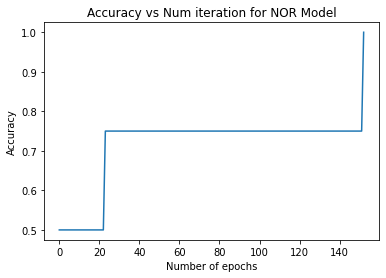

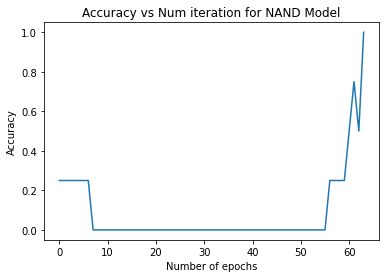

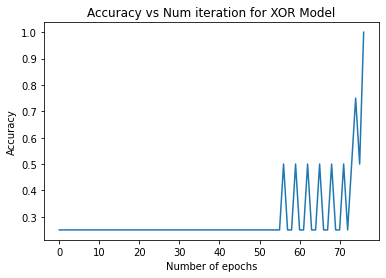

In [52]:
draw_graph(accuracy_nor, "NOR")
draw_graph(accuracy_nand, "NAND")
draw_graph(accuracy_xor, "XOR")

##### Testing

In [55]:
def Rosenblatt_predict(X, w, model):
    X = np.c_[np.ones((X.shape[0], 1)), X] # Appending 1 for the bias term
    
    if model == "NOR":
        return (np.dot(X, w) > 0).astype(np.int32)    # Output value
    if model == "NAND":
        return (np.dot(X, w) > 0).astype(np.int32)    # Output value
    if model == "XOR":
        X = np.c_[X, X[:, -1]*X[:, -2]]
        return (np.dot(X, w) > 0).astype(np.int32)    # Output value
    
    return "Implemented models are NOR, NAND and XOR!"

In [65]:
print("NOR Result")
print("----------")
print_result(X_test, Rosenblatt_predict(X_train, w_nor, "NOR"))
print("NAND Result")
print("----------")
print_result(X_test, Rosenblatt_predict(X_train, w_nand, "NAND"))
print("XOR Result")
print("----------")
print_result(X_test, Rosenblatt_predict(X_train, w_xor, "XOR"))

NOR Result
----------
   a1  a2  s
0   0   0  1
1   0   1  0
2   1   0  0
3   1   1  0
NAND Result
----------
   a1  a2  s
0   0   0  1
1   0   1  1
2   1   0  1
3   1   1  0
XOR Result
----------
   a1  a2  s
0   0   0  0
1   0   1  1
2   1   0  1
3   1   1  0


##### Observations
##### Effect of intializing different weights 
**NOR Gate** <br />

| w0 | w1 | w2 | Converging|
| --- | --- | --- | --- |
| 0.84 | 0.43 | 0.04 | Converged |
| 0.72 | 0.27 | 0.76 | Converged |
| 0.34 | 0.13 | 0.54 | Converged |
| 0.70 | 0.77 | 0.87 | Converged |


**NAND Gate** <br />

| w0 | w1 | w2 | Converging|
| --- | --- | --- | --- |
| 0.45 | 0.94 | 0.46 | Converged |
| 0.96 | 0.03 | 0.48 | Converged |
| 0.49 | 0.32 | 0.01 | Converged |
| 0.71 | 0.26 | 0.26 | Converged |

**XOR Gate** <br />

| w0 | w1 | w2 | w3 | Converging|
| --- | --- | --- | --- | --- |
| 0.75 | 0.51 | 0.70 | 0.20 | Converged |
| 0.72 | 0.97 | 0.56 | 0.27 | Converged |
| 0.86 | 0.85 | 0.29 | 0.51 | Converged |
| 0.15 | 0.42 | 0.41 | 0.63 | Converged |

##### Effect of using different learning rates
**NOR Gate** <br />

| Learning rate $(\eta)$ | Number of epochs until convergence |
| --- | --- | 
| 0.001 | 1000 |
| 0.01 | 153 | 
| 0.1 | 12 | 


**NAND Gate** <br />

| Learning rate $(\eta)$ | Number of epochs until convergence |
| --- | --- | 
| 0.001 | 749 |
| 0.01 | 64 | 
| 0.1 | 13 | 

**XOR Gate** <br />

| Learning rate $(\eta)$ | Number of epochs until convergence |
| --- | --- | 
| 0.001 | 929 |
| 0.01 | 77 | 
| 0.1 | 13 | 

##### Conclusion

* Networks consisting of Rosenblatt neurons with binary (ON-OFF) output signals can be configured to perform several logical functions such as NOR, NAND and XOR logical function.
* Multi-layer perceptron are required to implement XOR since a single Rosenblatt's neuron can only implement linearly separable class.
* The initialisation of weight doesn't seem to have any effect on the convergence.
* The increase in the learning rate leads to faster convergence i.e. lesser number of steps are required for convergence, given that the learning rate is not too high.
* The model is able to reach an accuracy of 1.

## Experiment 2

**Title**: Demonstrate the working of Widrow's Adaline Model.

**Objective**: To observe and understand the working of Widrow's Adaline Model.

**Hypothesis**: Widrow's Adaline Model will be able learn appropriate parameters/weights to represent the equation $y = 1 + 2x_1 + 2x_2$.

### Widrow's Adaline Model
#### Experimental Description:
1. Data generation: We will use synthetic data to train the model. First we will generate 100 samples of $x_1$ and $x_2$ from a uniform distribution between -50 to 50. Then we will calculate the value of $y$ for each of the input to prepare the train data. Similarly we can obtain the test data. <br /> 
2. Objective: We should be able to realize the following equation:<br />
<center>$y = 1 + 2x_1 + 2x_2$</center>
3. Operations:
   The activation value$(x)$ is the weighted sum of M inputs $(a_i)$ and a bias term$(\theta)$. Output funtion $f(x)$ is a linear function of the activation value. <br />
   Activation:   $x = \sum_{i=1}^{M}w_{i}a_{i}- \theta$ <br />
   Output signal:  $s = f(x)$ <br />
   Error:  $\delta = y - s$ <br />
   Weight update: $\Delta = \eta \delta a_{i}$ <br />
   Here the output function used is the identity function i.e. <br />
   <center>$f(x) = x$</center>
4. Training: Randomly initialize the weights. Iteratively update the weights of the neurons using the update equation defined above. During training plot the graph of error vs number of iterations so as to ensure that error is decreasing. <br />
5. Testing: Check whether the outputs from the model matches the desired outputs. We will use mean-squared error to evaluate the performance of our model which is defined as follows:<br />
<center>$Mean-Squared error = \sum_{j=1}^{N}\sum_{i=1}^{M}(y_{actual}^{(j)} - w_{i}a_{i} + \theta)^2$</center> <br />
where $N$ is the number of testing examples and $M$ is the number of inputs to the model

![Widrow's Adaline Model](tmp/IMG_4653.jpg)
<center>Source: Artificial Neural Networks by B. Yegnanarayana, PHI, 1999</center>

##### Implementation

In [54]:
from mpl_toolkits.mplot3d import Axes3D

##### Data

(10, 10)


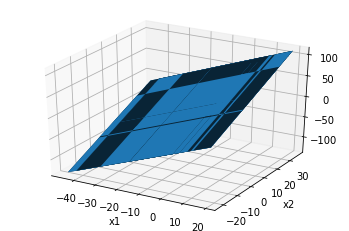

In [59]:
# Actual weights
w0 = 1
w1 = 2
w2 = 2

# Generating x1 and x2 for training 
x = np.random.uniform(low = -50, high=50, size=(10, 1))
y = np.random.uniform(low = -50, high=50, size=(10, 1))

# Calculating the value of y for training
X,Y = np.meshgrid(x,y)
Z= w2*X + w1*Y + w0
print(Z.shape)

# Plotting the training example
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [60]:
X_flatten = X.ravel()       # Flattening the X vector
Y_flatten = Y.ravel()       # Flattening the Y vector

X = np.c_[-1*np.ones((100, 1)), X_flatten, Y_flatten] # Augmenting the matrix X
y = Z.ravel()
y = np.expand_dims(y, axis=-1)

print(X.shape, y.shape)

(100, 3) (100, 1)


##### Weights

In [55]:
def init_weights(shape):
    '''
        This function is for initialising the weights for
        Widrow's Adaline model.
    '''
    return np.random.rand(shape)

##### Model

In [56]:
def MeanSquaredError(X, y, w):
    '''
        This function calculates the Mean Squared Error for
        the Widrow's Adaline model.
    '''
    return np.sum((np.dot(X, w)-y)**2)/X.shape[0]

In [71]:
def WidrowAdaline(X_train, y_train, learning_rate=0.01, num_iterations=1000):
    '''
        This function implements the Widrow's Adaline model.
    '''
    error = []
    
    w = init_weights(X.shape[1])              # Initialisation of weights
    print("Initial weights:", w)

    w = np.expand_dims(w, axis = -1)          # Adding another dimension to the weight matrix
    
    for i in range(num_iterations):           # epochs
        activation = np.dot(X_train, w)       # Activation/output value
        delta = y_train - activation          # error 
        w = w + (learning_rate*np.dot(X_train.T, delta))/X_train.shape[0]  # Weight update
        
        error.append(MeanSquaredError(X_train, y_train, w))     # Calculation of Mean Squared Error
        
        if (error[i] < 10e-10):
            break
            
    print("Number of epochs: ", len(error))
        
    return error, w

##### Training

In [83]:
error, w = WidrowAdaline(X, y, 0.001, 10000)

Initial weights: [0.25454523 0.77750196 0.47583459]
Number of epochs:  10000


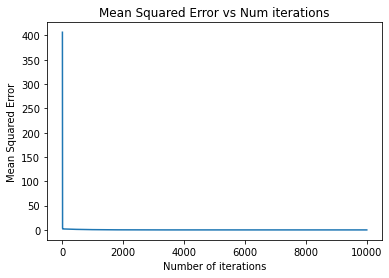

In [80]:
plt.figure()
plt.plot(error)
plt.xlabel("Number of iterations")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error vs Num iterations")
plt.show()

In [73]:
w

array([[-0.99789487],
       [ 1.99997969],
       [ 2.00004813]])

##### Testing

In [81]:
def WidrowAdalinePredict(X, w):
    '''
        This function is predicting the outcome of Widrow's 
        Adaline Model.
    '''
    return np.dot(X, w)

In [84]:
X_test = np.random.uniform(low = -100, high=100, size=(10, 2))  # Generating test data
X_test = np.c_[-1*np.ones((X_test.shape[0], 1)), X_test]     # Augment X matrix
y_test = np.dot(X_test, (np.array([[1, 2, 2]])).T)           # Generating testing y

y_pred = WidrowAdalinePredict(X_test, w)           # Predicting the outcome

print("Mean Squared Error for testing Data is: {}".format(MeanSquaredError(X_test, y_test, w)))  # Mean Squared Error

Mean Squared Error for testing Data is: 3.9927388532522783


##### Observations 
##### Effect of changing weights
| w0 | w1 | w2 | Converging|
| --- | --- | --- | --- |
| 0.48 | 0.69 | 0.07 | Converged |
| 0.03 | 0.85 | 0.69 | Converged |
| 0.88 | 0.03 | 0.11 | Converged |
| 0.02 | 0.20 | 0.45 | Converged |

##### Effect of different learning rates
| Learning rate $(\eta)$ | Converging |
| --- | --- | 
| 0.001 | Converging |
| 0.01 | Not Converged | 
| 0.1 | Not Converged | 


##### Conclusion
* The model is able to implement the equation $y = 1 + 2x_1 + 2x_2$ as the weights obtained from learning are close to the actual weights.
* The initialisation of weight doesn't seem to have any effect on the convergence.
* If we increase the learning rate beyond a certain limit the model may fail to converge.
* The model is minimizing the Mean Squared Error or Least Mean Squared (LMS) Error over successive iterations.
* The weight update equation is similar to the negative gradient of the error surface.

## References
* The pictures are taken from Artificial Neural Networks by B. Yegnanarayana, PHI, 1999